In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys
#wd = '../'
#sys.path.insert(0,wd)
from dr_path import settings
from dr_path.db import io, models
from dr_path.loadshape.precalculated_features import hourly_shift_potential
from dr_path.loadshape.utils import create_cal_data
%matplotlib inline

# Compare 2012 run supply curves
for fixed incentives versus hi/med/lo incentives

In [15]:
region = 'NENG'
db_file = os.path.join(settings.ROOT_DIR, region, 'dr_path_{r}.db'.format(r=region))
print(db_file)
#Close the DB if it's open
try:
    models.database.close()
except:
    pass
models.database.init(db_file)
models.database.connect()
print('Database contains {} demand scenarios.'.format(models.DemandScenario.select().count()))


/mnt/sdb/bgerke_cache/bto_ee_dr_cache/dr_path_inputs_resstock_comstock_2012/NENG/dr_path_NENG.db
Database contains 6 demand scenarios.


In [16]:

year=2025
dr_type='shift'
scen = 'Baseline'
ds_name = 'BaseDemand_{s}_2012AMY'.format(s=scen)

#BaseDemand_Baseline_2012AMY
#BaseDemand_ControlsOnly_2012AMY
#BaseDemand_EnvelopeOnly_2012AMY
#BaseDemand_EnvelopePlusControlsPlusEquipment_2012AMY
#BaseDemand_EnvelopePlusControls_2012AMY
#BaseDemand_EquipmentOnly_2012AMY

h = 'h' if dr_type=='shift' else ''


dem = models.DemandScenario.get(name=ds_name)
tou = models.TOUImpactScenario.get(name='none')
ren = models.RenewableScenario.select().where(models.RenewableScenario.weather ==
                                          dem.weather)[0]

    
ts = models.TechnologyScenario.get(name='Med')
sup = io.get_supply_curve(dem, tou, ren, ts, year=year, timescale='year', 
                          dr_type=dr_type, disaggregate_by=['sector','end_use'],
                          exclude={'end_use':['battery']})
sup

sector                       com                                             \
end_use                  cooling        heating refrigeration water_heating   
procurement_price                                                             
25.0                  141.379101       0.000000      0.000000      0.000000   
50.0                 1275.441045    8803.924188      0.000000   1030.292777   
75.0                14179.054385   48820.292760      0.000000   1405.277677   
100.0               21313.098005  187992.669483      0.000000   1758.130730   
150.0               35744.335116  419581.609933      0.000000   2120.602623   
200.0               49959.652787  526666.442264    190.620508   2954.699258   
250.0               73631.586067  545700.731358    546.485430   5248.686115   
300.0               88256.450237  546266.179714    603.674690  18836.026024   
350.0              109643.037270  546266.179714   1137.928877  39963.330214   
400.0              121216.698532  546266.179714   1543.728847  43339.085926   
450.0              135271.143149  546266.179714   1911.601333  44228.388275   
500.0              161801.304372  546266.179714   2419.305194  45747.470054   
550.0              196966.280452  546266.179714   2855.584108  45785.990034   
600.0              258351.104697  546266.179714   2872.015762  45789.263124   

sector                       res                                              
end_use                  cooling        heating     pool_pump  water_heating  
procurement_price                                                             
25.0                    0.000000       0.000000      0.000000       0.000000  
50.0                    0.000000  119218.099954      0.000000       0.000000  
75.0                    0.000000  233294.698046      0.000000       0.000000  
100.0                   0.000000  428728.043553      0.000000       0.000000  
150.0                   0.000000  581240.531212      0.000000       0.000000  
200.0                   0.000000  601909.626722      0.000000       0.254747  
250.0                   0.000000  601909.626722      0.000000   10847.053962  
300.0                   0.000000  601909.626722      0.000000  172905.140215  
350.0               39617.512084  601909.626722      0.000000  309609.940656  
400.0              206593.978965  601909.626722      0.000000  310888.789456  
450.0              408275.385258  601909.626722      0.000000  311351.113114  
500.0              425869.805973  601909.626722   3007.693759  312429.226937  
550.0              431134.683418  601909.626722  24361.182019  312789.659099  
600.0              453674.553057  601909.626722  25628.230091  312789.659099

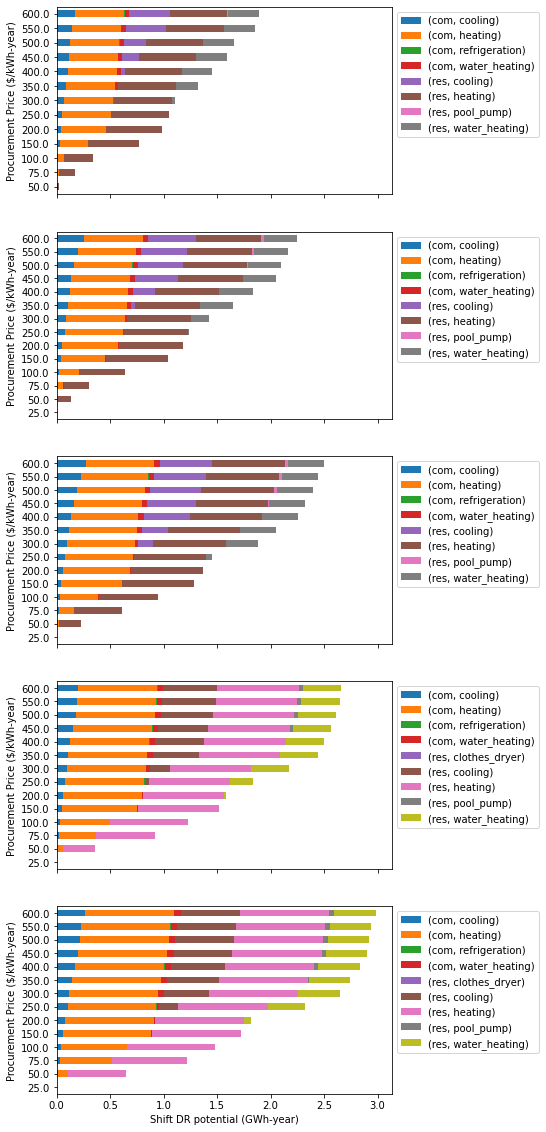

In [17]:
fig, axs = plt.subplots(5,1, figsize=[6,20], sharex=True)
for i,(y,_) in enumerate(settings.YEAR_CHOICES):
    ax = axs[i]
    supy = io.get_supply_curve(dem, tou, ren, ts, year=y, timescale='year', 
                          dr_type=dr_type, disaggregate_by=['sector','end_use'],
                          exclude={'end_use':['battery']})
    ax = (supy/(1000**2)).plot.barh(stacked=True, ax=ax)
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(bbox_to_anchor=(1.0,1.0))
    ax.set_xlabel("{t} DR potential (GW{h}-year)".format(t=dr_type.capitalize(), h=h))
    ax.set_ylabel("Procurement Price ($/kW{h}-year)".format(h=h))
    #plt.show()

In [18]:
db_file = os.path.join(settings.ROOT_DIR,  region, 'dr_path_{r}.db'.format(r=region))
print(db_file)
#Close the DB if it's open
try:
    models.database.close()
except:
    pass
models.database.init(db_file)
models.database.connect()
print('Database contains {} demand scenarios.'.format(models.DemandScenario.select().count()))

dem = models.DemandScenario.get(name=ds_name)
tou = models.TOUImpactScenario.get(name='none')
ren = models.RenewableScenario.select().where(models.RenewableScenario.weather ==
                                          dem.weather)[0]

ts = models.TechnologyScenario.get(name='Med')
sup = io.get_supply_curve(dem, tou, ren, ts, year=year, timescale='year', 
                          dr_type=dr_type, disaggregate_by=['sector','end_use'],
                          exclude={'end_use':['battery']})
#sup

/mnt/sdb/bgerke_cache/bto_ee_dr_cache/dr_path_inputs_resstock_comstock_2012/NENG/dr_path_NENG.db
Database contains 6 demand scenarios.


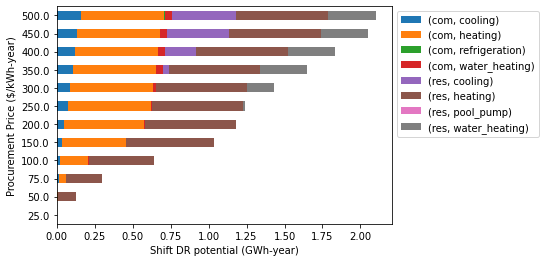

In [19]:
plot_barchart = (sup.loc[:500]/(1000**2)).plot.barh(stacked=True)
lines, labels = plot_barchart.get_legend_handles_labels()
plot_barchart.legend(bbox_to_anchor=(1.0,1.0))
plt.xlabel("{t} DR potential (GW{h}-year)".format(t=dr_type.capitalize(), h=h))
plt.ylabel("Procurement Price ($/kW{h}-year)".format(h=h))
plt.show()

In [20]:
dembase = models.DemandScenario.get(name='BaseDemand_Baseline_2012AMY')
featbase = io.modelselect2dataframe(
    models.CLSFeature.select(models.CLSFeature.dr_type,
                             models.EndUse.name,
                             models.CLSFeature.value).join(
        models.ClusterLoadShape).join(
        models.EndUse).switch(models.ClusterLoadShape).join(
        models.Cluster).where(
        (models.CLSFeature.demand_scenario == dembase) &
        (models.Cluster.year == year) &
        (models.CLSFeature.dr_type=='shift') & 
        (models.CLSFeature.timescale=='year') &
        (models.EndUse.name=='clothes_dryer') &
        True
    )
)

feat = io.modelselect2dataframe(
    models.CLSFeature.select(models.CLSFeature.dr_type,
                             models.EndUse.name,
                             models.CLSFeature.value).join(
        models.ClusterLoadShape).join(
        models.EndUse).switch(models.ClusterLoadShape).join(
        models.Cluster).where(
        (models.CLSFeature.demand_scenario == dem) &
        (models.Cluster.year == year) &
        (models.CLSFeature.dr_type=='shift') & 
        (models.CLSFeature.timescale=='year') &
        (models.EndUse.name=='clothes_dryer') &
        True
    )
)

supbase = io.get_supply_curve(dembase, tou, ren, ts, year=year, timescale='year', 
                          dr_type=dr_type, disaggregate_by=['sector','end_use'],
                          exclude={'end_use':['battery']})

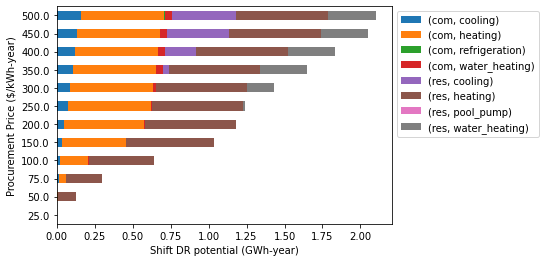

In [21]:
plot_barchart = (supbase.loc[:500]/(1000**2)).plot.barh(stacked=True)
lines, labels = plot_barchart.get_legend_handles_labels()
plot_barchart.legend(bbox_to_anchor=(1.0,1.0))
plt.xlabel("{t} DR potential (GW{h}-year)".format(t=dr_type.capitalize(), h=h))
plt.ylabel("Procurement Price ($/kW{h}-year)".format(h=h))
plt.show()

Text(0, 0.5, 'Procurement Price ($/kWh-year)')

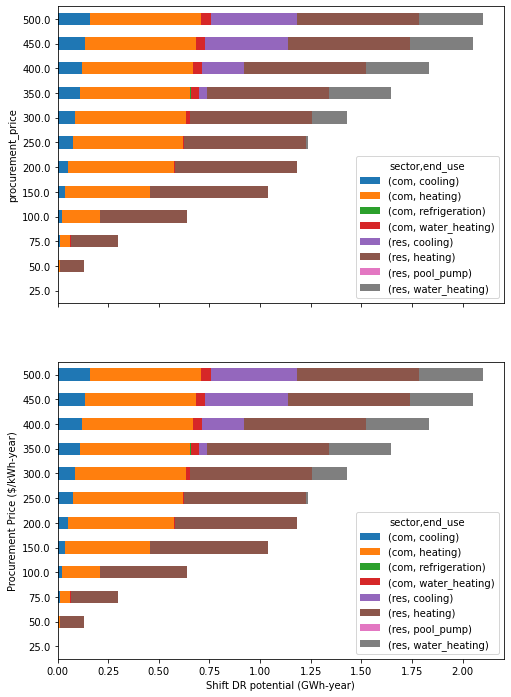

In [22]:
fig, axs = plt.subplots(2,1, figsize=[8,12], sharex=True)
plot_barchart = (supbase.loc[:500]/(1000**2)).plot.barh(stacked=True, ax=axs[0])
#plot_barchart.legend(bbox_to_anchor=(1.0,1.0))

plot_barchart = (sup.loc[:500]/(1000**2)).plot.barh(stacked=True, ax=axs[1])
plt.xlabel("{t} DR potential (GW{h}-year)".format(t=dr_type.capitalize(), h=h))
plt.ylabel("Procurement Price ($/kW{h}-year)".format(h=h))

In [23]:
pw = io.get_pathways_df_at_price(dem, tou, ren, ts, 500, 
                                 year=year, dr_type=dr_type, 
                                 end_uses=['water_heating']
                                )
pw['technology_name'].unique()


array(['Res Water Heating with Mixing Valve',
       'Res waterheater connected control',
       'Com Water Heating with Mixing Valve',
       'Com waterheater connected control'], dtype=object)

In [116]:
tech = models.DRTechnology.get(description='Res clotheswasher connected control w/ equipment upgrades')
print(tech.description)
print(tech.local_control.description)
tech.demand_scenario_list

Res clotheswasher connected control w/ equipment upgrades
Clothes washer connected control w/EE upgrades


'BaseDemand_EquipmentOnly_2012AMY, BaseDemand_EnvelopePlusControlsPlusEquipment_2012AMY'

In [126]:
def get_ia(ds):

    ia = io.modelselect2dataframe(
        models.IncentiveAdoption.select(
            models.SiteInstallation.cluster,
            models.SiteInstallation.building_type,
            models.SiteInstallation.end_use,
            models.SiteInstallation.technology_name,
            models.SiteInstallation.dr_type,
            models.SiteInstallation.cost_initial,
            models.SiteInstallation.cost_operating,
            models.IncentiveAdoption.incentive,
            models.IncentiveAdoption.cost_total,
            models.IncentiveAdoption.cost_total_per_kw,
            models.IncentiveAdoption.dr_enroll_prob,
            models.SiteInstallation.dr_resource_kw_site,
            models.SiteInstallation.dr_install_kw_site
            ).join(
            models.SiteInstallation).join(
            models.CLSFeature).where(
            (models.SiteInstallation.dr_type==dr_type) &
            (models.SiteInstallation.end_use.in_(['cooling',#'clothes_washer','dishwasher'
                                                 ])) &
            (models.CLSFeature.demand_scenario==ds) & 
            (models.IncentiveAdoption.cost_frame=='gross')
        )
    )
    return ia

ia = get_ia(dem) 
iabase = get_ia(dembase)
ia.loc[(ia['cost_total_per_kw']<= 150) &
       (ia['building_type'].str.contains('Detached'))].head(50)

cluster  \
5283   CA_Barstow.Daggett.AP-Single-Family_Detached_c...   
5284   CA_Barstow.Daggett.AP-Single-Family_Detached_c...   
15897  CA_Bakersfield-Meadows.Field-Single-Family_Det...   
15898  CA_Bakersfield-Meadows.Field-Single-Family_Det...   
15936     CA_Barstow.Daggett.AP-Single-Family_Detached_0   
15939  CA_Barstow.Daggett.AP-Single-Family_Detached_c...   
15942  CA_Barstow.Daggett.AP-Single-Family_Detached_c...   
15943  CA_Barstow.Daggett.AP-Single-Family_Detached_c...   
17388  CA_Fresno.Air.Terminal-Single-Family_Detached_...   
17389  CA_Fresno.Air.Terminal-Single-Family_Detached_...   
18234  CA_Long.Beach-Daugherty.Field-Single-Family_De...   
26634  CA_Bakersfield-Meadows.Field-Single-Family_Det...   
26635  CA_Bakersfield-Meadows.Field-Single-Family_Det...   
26673     CA_Barstow.Daggett.AP-Single-Family_Detached_0   
26676  CA_Barstow.Daggett.AP-Single-Family_Detached_c...   
26677  CA_Barstow.Daggett.AP-Single-Family_Detached_c...   
26679  CA_Barstow.Daggett.AP-Single-Family_Detached_c...   
26680  CA_Barstow.Daggett.AP-Single-Family_Detached_c...   
28119  CA_Fresno.Air.Terminal-Single-Family_Detached_...   
28120  CA_Fresno.Air.Terminal-Single-Family_Detached_...   
28965  CA_Long.Beach-Daugherty.Field-Single-Family_De...   
30963  CA_Sacramento.Exec.AP-Single-Family_Detached_c...   
31209  CA_San.Diego-Lindbergh.Field-Single-Family_Det...   
37290  CA_Bakersfield-Meadows.Field-Single-Family_Det...   
37291  CA_Bakersfield-Meadows.Field-Single-Family_Det...   
37329     CA_Barstow.Daggett.AP-Single-Family_Detached_0   
37330     CA_Barstow.Daggett.AP-Single-Family_Detached_0   
37332  CA_Barstow.Daggett.AP-Single-Family_Detached_c...   
37333  CA_Barstow.Daggett.AP-Single-Family_Detached_c...   
37335  CA_Barstow.Daggett.AP-Single-Family_Detached_c...   
37336  CA_Barstow.Daggett.AP-Single-Family_Detached_c...   
38727  CA_Fresno.Air.Terminal-Single-Family_Detached_...   
38728  CA_Fresno.Air.Terminal-Single-Family_Detached_...   
39531  CA_Long.Beach-Daugherty.Field-Single-Family_De...   
39532  CA_Long.Beach-Daugherty.Field-Single-Family_De...   
41493  CA_Sacramento.Exec.AP-Single-Family_Detached_c...   
41739  CA_San.Diego-Lindbergh.Field-Single-Family_Det...   

                          building_type  end_use  \
5283   Single-Family Detached_efficient  cooling   
5284   Single-Family Detached_efficient  cooling   
15897  Single-Family Detached_efficient  cooling   
15898  Single-Family Detached_efficient  cooling   
15936            Single-Family Detached  cooling   
15939  Single-Family Detached_efficient  cooling   
15942  Single-Family Detached_efficient  cooling   
15943  Single-Family Detached_efficient  cooling   
17388  Single-Family Detached_efficient  cooling   
17389  Single-Family Detached_efficient  cooling   
18234  Single-Family Detached_efficient  cooling   
26634  Single-Family Detached_efficient  cooling   
26635  Single-Family Detached_efficient  cooling   
26673            Single-Family Detached  cooling   
26676  Single-Family Detached_efficient  cooling   
26677  Single-Family Detached_efficient  cooling   
26679  Single-Family Detached_efficient  cooling   
26680  Single-Family Detached_efficient  cooling   
28119  Single-Family Detached_efficient  cooling   
28120  Single-Family Detached_efficient  cooling   
28965  Single-Family Detached_efficient  cooling   
30963  Single-Family Detached_efficient  cooling   
31209  Single-Family Detached_efficient  cooling   
37290  Single-Family Detached_efficient  cooling   
37291  Single-Family Detached_efficient  cooling   
37329            Single-Family Detached  cooling   
37330            Single-Family Detached  cooling   
37332  Single-Family Detached_efficient  cooling   
37333  Single-Family Detached_efficient  cooling   
37335  Single-Family Detached_efficient  cooling   
37336  Single-Family Detached_efficient  cooling   
38727  Single-Family Detached_efficient  cooling   
38728  Single-Family Detached_efficient  cooling   


In [121]:
iabase.loc[iabase['cost_total_per_kw']<= 900]

cluster  \
12            CA_Bakersfield-Meadows.Field-Mobile_Home_0   
13            CA_Bakersfield-Meadows.Field-Mobile_Home_0   
14            CA_Bakersfield-Meadows.Field-Mobile_Home_0   
15     CA_Bakersfield-Meadows.Field-Multi-Family_with...   
16     CA_Bakersfield-Meadows.Field-Multi-Family_with...   
...                                                  ...   
25747                  NV_Reno.Cannon.Intl-SmallHotel-5B   
25748                  NV_Reno.Cannon.Intl-SmallHotel-5B   
25752                  NV_Reno.Cannon.Intl-SmallHotel-6B   
25753                  NV_Reno.Cannon.Intl-SmallHotel-6B   
25754                  NV_Reno.Cannon.Intl-SmallHotel-6B   

                       building_type  end_use             technology_name  \
12                       Mobile Home  cooling  Res. cooling (Smart Tstat)   
13                       Mobile Home  cooling  Res. cooling (Smart Tstat)   
14                       Mobile Home  cooling  Res. cooling (Smart Tstat)   
15     Multi-Family with 2 - 4 Units  cooling  Res. cooling (Smart Tstat)   
16     Multi-Family with 2 - 4 Units  cooling  Res. cooling (Smart Tstat)   
...                              ...      ...                         ...   
25747                     SmallHotel  cooling             Com AC (TES)-sm   
25748                     SmallHotel  cooling             Com AC (TES)-sm   
25752                     SmallHotel  cooling             Com AC (TES)-sm   
25753                     SmallHotel  cooling             Com AC (TES)-sm   
25754                     SmallHotel  cooling             Com AC (TES)-sm   

      dr_type  cost_initial  cost_operating  incentive   cost_total  \
12      shift     17.916667           15.22       25.0    95.382228   
13      shift     17.916667           15.22       50.0    95.142194   
14      shift     17.916667           15.22      100.0   103.753037   
15      shift     17.916667           15.22       25.0    96.145949   
16      shift     17.916667           15.22       50.0    96.669637   
...       ...           ...             ...        ...          ...   
25747   shift   2000.618471            0.00       50.0  4743.165545   
25748   shift   2000.618471            0.00      100.0  6123.973777   
25752   shift   1485.282525            0.00       25.0  3054.379370   
25753   shift   1485.282525            0.00       50.0  3500.618179   
25754   shift   1485.282525            0.00      100.0  4487.595798   

       cost_total_per_kw  dr_enroll_prob  dr_resource_kw_site  \
12            294.633297            0.20             0.323732   
13            293.891840            0.30             0.323732   
14            320.490516            0.55             0.323732   
15            271.383410            0.20             0.354281   
16            272.861583            0.30             0.354281   
...                  ...             ...                  ...   
25747         170.090280            0.25            27.886165   
25748         219.606169            0.40            27.886165   
25752         152.646062            0.10            20.009552   
25753         174.947351            0.25            20.009552   
25754         224.272673            0.40            20.009552   

       dr_install_kw_site  
12               1.972764  
13               1.972764  
14               1.972764  
15               1.586073  
16               1.586073  
...                   ...  
25747           52.099439  
25748           52.099439  
25752           38.679232  
25753           38.679232  
25754           38.679232  

[20134 rows x 13 columns]

BaseDemand_ControlsOnly_2012AMY


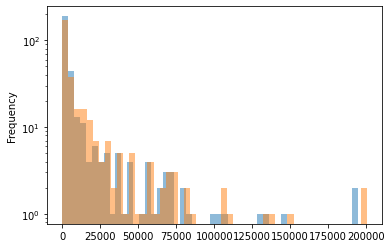

In [322]:
ax = featbase['value'].plot.hist(bins=50, alpha=0.5)
feat['value'].plot.hist(bins=50, alpha=0.5, ax=ax)
ax.set_yscale('log')
print(dem.name)

In [353]:
pwbase = io.get_pathways_df_at_price(dem_base, tou, ren, ts, 500, 
                                 year=year, dr_type=dr_type, 
                                 end_uses=['clothes_dryer']
                                )
pwbase['technology_name'].unique()

NameError: name 'dem_base' is not defined

In [265]:
for eu in models.EndUse.select():
    print(eu.name)

water_heating
cooling
cooling
total
heating
lighting
pool_pump
refrigeration
heating
dishwasher
clothes_washer
refrigeration
clothes_dryer
plug_load
lighting
water_heating
interior_equipment
hvac_system
total
cooking
other
plug_loads
other
total
battery
battery
battery


In [196]:
models.database.close()

True